# Task 4: Predicting the classes using Decision Tree Algorithm

### Name : Sampada Pradeep Suryawanshi

### Objective: For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

##### Decision Tree :
- Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with leaf nodes.


###### Assumption:
- There are no such assumption.

In [1]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
# Load the iris dataset
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)      ### Forming the iris dataframe
print(len(df))
df.head(3)

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
print("Dimension of Dataset is:",df.shape)
###(rows,coloum)

Dimension of Dataset is: (150, 4)


#### checking for null value 

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [8]:
##tacking care of null values
df.isna().sum()
print("Total count of missing values in our dataset is: ",df.isna().sum().sum())

Total count of missing values in our dataset is:  0


###### As we can see that there are no missing values in our dataset. 

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [11]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
x=df
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [15]:
decisionTree=DecisionTreeClassifier(random_state=0)
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
y_pred=decisionTree.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy of our model is:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy of our model is: 91.11 %


###### Our trained model is giving 91.11% accuracy. 

In [18]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 14,  4],
       [ 0,  0, 11]], dtype=int64)

Interpretating Confusion Matrix:

       It gives us the rate of True Positive, True Negative, False Negative, False Positive
       We can do the below calculations from Confusion Matrix.
       1. Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
       2. Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN
       3. Precision (true positives / predicted positives) = TP / TP + FP
  From our matrix these calculations are:

       1. Accuracy = 0.91  (which is similar to sklearn.metrics's)  accuracy_score 
       2. Misclassified = 0.089    i.e (1 - accuracy)
       3. If we consider one vs rest. (3rd) class vs (1st+2nd) class
          = (16+14)/(16+14+4) = 30/34 = 0.88


[Text(325.5, 713.475, 'petal width (cm) <= -0.615\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris-versicolor'),
 Text(244.125, 554.925, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-virginica'),
 Text(406.875, 554.925, 'petal length (cm) <= 0.624\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = Iris-versicolor'),
 Text(162.75, 396.375, 'petal width (cm) <= 0.544\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-setosa'),
 Text(81.375, 237.82499999999993, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-setosa'),
 Text(244.125, 237.82499999999993, 'sepal width (cm) <= 0.126\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-versicolor'),
 Text(162.75, 79.27499999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-versicolor'),
 Text(325.5, 79.27499999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-setosa'),
 Text(651.0, 396.375, 'petal width (cm) <= 0.673\ngini = 0.053\nsamples = 37\n

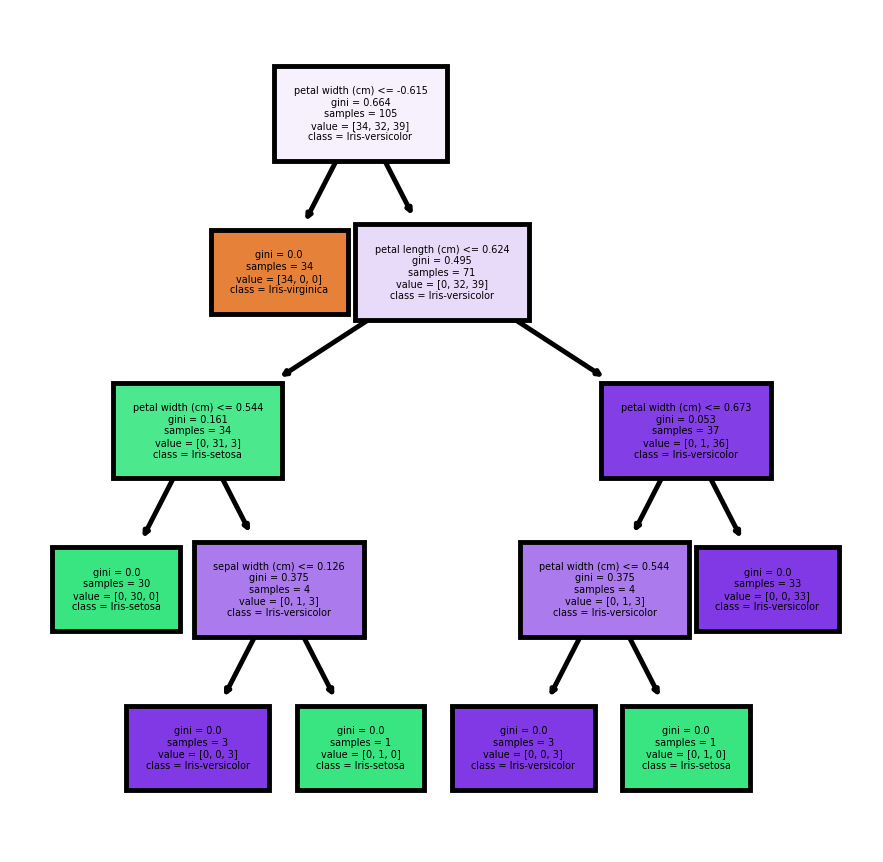

In [19]:
#plt.figure(figsize=(15,10))
#tree.plot_tree(decisionTree,filled=True)
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=350)
fn=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]
tree.plot_tree(decisionTree,feature_names=fn,class_names=["Iris-virginica","Iris-setosa","Iris-versicolor"],filled=True,fontsize=2)

###### Reading the decision tree:


1.   Here we have made the split using GINI impurity
2.   Using this criteria we have selected 'petal width' feature for the root node split.
3.   We have correctly classified all the observations with good accuracy(can be viewed from the leaf node)


In [20]:
print(tree.export_text(decisionTree))

|--- feature_3 <= -0.62
|   |--- class: 0
|--- feature_3 >  -0.62
|   |--- feature_2 <= 0.62
|   |   |--- feature_3 <= 0.54
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.54
|   |   |   |--- feature_1 <= 0.13
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.13
|   |   |   |   |--- class: 1
|   |--- feature_2 >  0.62
|   |   |--- feature_3 <= 0.67
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.67
|   |   |   |--- class: 2



### Post pruning decision trees with cost complexity pruning 

DecisionTreeClassifier provides parameters such as min_samles_leaf and max_depth to prevent a tree from overfiting.Cost complexity  pruning provides another option to control the size of a tree.  

Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood.

In [21]:
path=decisionTree.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [22]:
ccp_alphas

array([0.        , 0.00926641, 0.01428571, 0.03781513, 0.26417519,
       0.32949954])

In [23]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
print("number of nodes in the last tree is:{} with ccp_alpha: {} ".format(
       clfs[-1].tree_.node_count,ccp_alphas[-1]))    

number of nodes in the last tree is:1 with ccp_alpha: 0.32949953690396344 


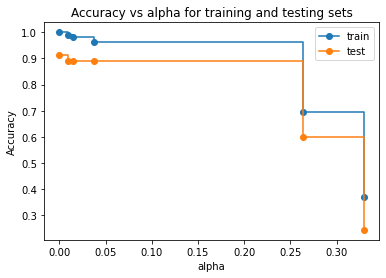

In [24]:
train_scores=[clf.score(x_train,y_train) for clf in clfs]
test_scores=[clf.score(x_test,y_test) for clf in clfs]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

####   From this graph we can clearly see that,model is not overfitting the data at severe extent.

In [25]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.0001)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, random_state=0)

In [26]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9111111111111111

[Text(334.8, 489.24, 'X[3] <= -0.615\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(418.5, 380.52000000000004, 'X[2] <= 0.624\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(167.4, 271.8, 'X[3] <= 0.544\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(251.10000000000002, 163.08000000000004, 'X[1] <= 0.126\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 271.8, 'X[3] <= 0.673\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(585.9, 163.08000000000004, 'X[3] <= 0.544\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(502.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 

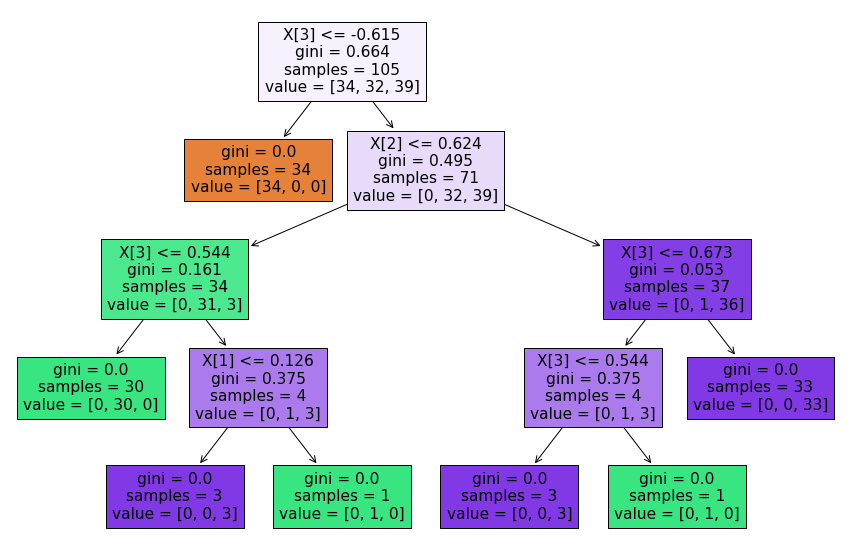

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)


### Here,gini=0 indicates no further proceeding is required.

### From this also it is clear that,there is no overfitting issue,since we are getting same accuracy even after post pruning our decision tree.